### Data visualization tool for Pacwar Project

In [224]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
% matplotlib inline

UsageError: Line magic function `%` not found.


In [238]:
def Merge_parent(n):
    '''
    Merge result for parent gene
    '''
    pieces = {}
    for i in range (n):
        a = "%sparent.txt" % str(i)
        data = pd.read_csv(a, sep='/n',header=None)
        data.columns = ['Gene']
        data.reset_index()
        df = data.Gene.str.split(' score=',expand=True)
        df.columns = ['Gene','Score']
        pieces[i] = df
    df = pd.concat(pieces)
    df.reset_index(inplace = True)
    df.reset_index(inplace = True)
    df.drop("index",inplace = True, axis = 1)
    df.drop("level_1",inplace = True, axis = 1)
    df.columns= ['Generation','Gene','Score']
    df_2 = df.Gene.apply(lambda x: process_gene(x))
    df.drop('Gene',inplace = True,axis = 1)
    df = df.join(df_2,how = 'left')
    df_s = df.Gene.str.split('-',expand = True)
    df = df.join(df_s,how = 'left')
    df.drop('Gene',inplace = True, axis =1 )
    column_name = ['Generation','Score'] + ['Spot_%i' %i for i in range (1,51)]
    df.columns = column_name
    df.to_csv (r'Merge_parent.csv', index = False, header=True)
    for column in df.columns:
        df[column] = df[column].astype(int)
    return df
df = Merge_parent(1000)
df.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,Generation,Score,Spot_1,Spot_2,Spot_3,Spot_4,Spot_5,Spot_6,Spot_7,Spot_8,...,Spot_41,Spot_42,Spot_43,Spot_44,Spot_45,Spot_46,Spot_47,Spot_48,Spot_49,Spot_50
0,0,193,1,0,1,1,1,0,1,1,...,1,1,1,1,1,0,1,1,0,1
1,0,189,1,0,1,1,1,1,1,2,...,1,1,1,1,1,1,1,2,2,1
2,0,178,1,0,1,1,1,0,3,0,...,0,2,0,1,0,0,1,1,1,1
3,0,124,1,2,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
4,0,111,1,1,1,1,1,1,1,0,...,1,1,3,1,1,1,1,1,2,1


In [239]:
def insertChar(mystring, position, chartoinsert):
    mystring   =  mystring[:position] + chartoinsert + mystring[position:] 
    return mystring  

def process_gene(s):
    '''
    Split gene into several part
    INPUT:  mystring --- gene   str
            index    --- split index  list
    OUTPUT: gene_processed --- str
    '''
    pos = [i for i in range(1,50)]
    for i in range (len(pos)):
        p = pos[i]+i
        s = insertChar(s, p, '-')
    return s
s = '10111112301130111311111111111112111111131111111221'
process_gene(s)

'1-0-1-1-1-1-1-2-3-0-1-1-3-0-1-1-1-3-1-1-1-1-1-1-1-1-1-1-1-1-1-2-1-1-1-1-1-1-1-3-1-1-1-1-1-1-1-2-2-1'

In [244]:
def data_generation_single (df,n):
    df_p = df[df['Generation'] == n]
    data = {}
    for i in range (1,50):
        col = "Spot_%d" %i
        index = df_p[col].value_counts().index
        list_count = df_p[col].value_counts()
        res = []
        for i in range (4):
            if i in index:
                res.append(list_count[i])
            else:
                res.append(0)
        data[col] = res
    df = pd.DataFrame(data)
    plotdata = df_test.T
    plotdata.index = [i for i in range (1,50)]
    return plotdata
data_plot = data_generation_single (df,10)
data_plot

,0,1,2,3
1,0,5,0,7
2,5,0,0,7
3,0,5,0,7
4,0,5,0,7
5,0,5,0,7
6,4,1,0,7
7,0,5,0,7
8,1,4,0,7
9,0,5,0,7
10,0,1,0,11


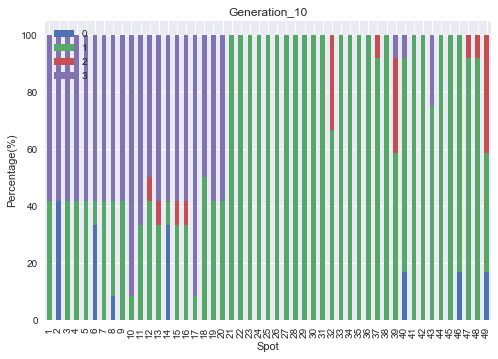

In [251]:
def plot_single(df,n):
    plotdata = data_plot
    stacked_data = plotdata.apply(lambda x: x*100/sum(x), axis=1)
    stacked_data.plot(kind="bar", stacked=True)
    plt.title("Generation_%d" %n)
    plt.xlabel("Spot")
    plt.ylabel("Percentage(%)")
    plt.savefig('books_read.png')
plot_single(data_plot,10)

Text(0, 0.5, 'Pies Consumed')

<Figure size 1280x720 with 0 Axes>

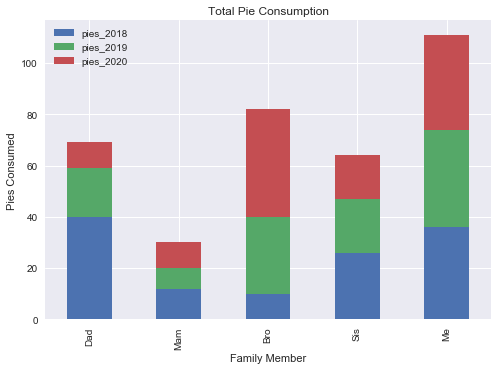

In [230]:
plotdata = pd.DataFrame({
    "pies_2018":[40, 12, 10, 26, 36],
    "pies_2019":[19, 8, 30, 21, 38],
    "pies_2020":[10, 10, 42, 17, 37]
    }, 
    index=["Dad", "Mam", "Bro", "Sis", "Me"]
)
plt.figure(figsize=(16,9), dpi= 80)
plotdata.plot(kind='bar', stacked=True)
plt.title("Total Pie Consumption")
plt.xlabel("Family Member")
plt.ylabel("Pies Consumed")